## Loading data

In [1]:
from collections import Counter

In [2]:
import pandas as pd
tweets = pd.read_csv('../data/TweetsCOV19.csv')
tweets.rename(columns={"TweetText": "x"}, inplace=True)
tweets['x'] = tweets['x'].astype(str)
tweets.dropna(subset=["Sentiment"], inplace=True)
tweets['UserLocation'] = tweets['UserLocation'].fillna("unknown")
tweets[['pos','neg']] = tweets['Sentiment'].str.split(" ", expand=True)
tweets["strat"] = tweets['pos'].astype(int) + tweets['neg'].astype(int) #+";"+ pd.to_datetime(tweets["Timestamp"]).dt.month.astype(str)

/tmp/ipykernel_3653/3058640308.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv('../data/TweetsCOV19.csv')


## Preprocessing code

In [3]:
emoticons = {
    ':*': '<kiss>',
    ':-*': '<kiss>',
    ':x': '<kiss>',
    ':-)': '<happy>',
    ':-))': '<happy>',
    ':-)))': '<happy>',
    ':-))))': '<happy>',
    ':-)))))': '<happy>',
    ':-))))))': '<happy>',
    ':)': '<happy>',
    ':))': '<happy>',
    ':)))': '<happy>',
    ':))))': '<happy>',
    ':)))))': '<happy>',
    ':))))))': '<happy>',
    ':)))))))': '<happy>',
    ':o)': '<happy>',
    ':]': '<happy>',
    ':3': '<happy>',
    ':c)': '<happy>',
    ':>': '<happy>',
    '=]': '<happy>',
    '8)': '<happy>',
    '=)': '<happy>',
    ':}': '<happy>',
    ':^)': '<happy>',
    '|;-)': '<happy>',
    ":'-)": '<happy>',
    ":')": '<happy>',
    '\\o/': '<happy>',
    '\\0/': '<happy>',
    ':-d': '<laugh>',
    ':d': '<laugh>',
    '8-d': '<laugh>',
    '8d': '<laugh>',
    'x-d': '<laugh>',
    'xd': '<laugh>',
    '=-d': '<laugh>',
    '=D': '<laugh>',
    '=-3': '<laugh>',
    '=3': '<laugh>',
    'b^d': '<laugh>',
    '>:[': '<sad>',
    ':-(': '<sad>',
    ':-((': '<sad>',
    ':-(((': '<sad>',
    ':-((((': '<sad>',
    ':-(((((': '<sad>',
    ':-((((((': '<sad>',
    ':-(((((((': '<sad>',
    ':(': '<sad>',
    ':((': '<sad>',
    ':(((': '<sad>',
    ':((((': '<sad>',
    ':(((((': '<sad>',
    ':((((((': '<sad>',
    ':(((((((': '<sad>',
    ':((((((((': '<sad>',
    ':-c': '<sad>',
    ':c': '<sad>',
    ':-<': '<sad>',
    ':<': '<sad>',
    ':-[': '<sad>',
    ':[': '<sad>',
    ':{': '<sad>',
    ':-||': '<sad>',
    ':@': '<sad>',
    ":'-(": '<sad>',
    ":'(": '<sad>',
    'd:<': '<sad>',
    'd:': '<sad>',
    'd8': '<sad>',
    'd;': '<sad>',
    'd=': '<sad>',
    'dX': '<sad>',
    'v.v': '<sad>',
    "d-':": '<sad>',
    '(>_<)': '<sad>',
    ':|': '<sad>',
    '>:O': '<surprise>',
    ':-O': '<surprise>',
    ':-o': '<surprise>',
    ':O': '<surprise>',
    '°o°': '<surprise>',
    'o_O': '<surprise>',
    'o_0': '<surprise>',
    'o.O': '<surprise>',
    'o-o': '<surprise>',
    '8-0': '<surprise>',
    '|-O': '<surprise>',
    ';-)': '<wink>',
    ';)': '<wink>',
    '*-)': '<wink>',
    '*)': '<wink>',
    ';-]': '<wink>',
    ';]': '<wink>',
    ';d': '<wink>',
    ';^)': '<wink>',
    ':-,': '<wink>',
    '>:p': '<tong>',
    ':-p': '<tong>',
    ':p': '<tong>',
    'x-': '<tong>',
    'x-p': '<tong>',
    'xp': '<tong>',
    ':-p': '<tong>',
    ':p': '<tong>',
    '=p': '<tong>',
    ':-Þ': '<tong>',
    ':Þ': '<tong>',
    ':-b': '<tong>',
    ':b': '<tong>',
    ':-&': '<tong>',
    '>:\\': '<annoyed>',
    '>:/': '<annoyed>',
    ':-/': '<annoyed>',
    ':-.': '<annoyed>',
    ':/': '<annoyed>',
    ':\\': '<annoyed>',
    '=/': '<annoyed>',
    '=\\': '<annoyed>',
    ':L': '<annoyed>',
    '=L': '<annoyed>',
    ':S': '<annoyed>',
    '>.<': '<annoyed>',
    ':-|': '<annoyed>',
    '<:-|': '<annoyed>',
    ':-x': '<seallips>',
    ':x': '<seallips>',
    ':-#': '<seallips>',
    ':#': '<seallips>',
    'o:-)': '<angel>',
    '0:-3': '<angel>',
    '0:3': '<angel>',
    '0:-)': '<angel>',
    '0:)': '<angel>',
    '0;^)': '<angel>',
    '>:)': '<devil>',
    '>:d': '<devil>',
    '>:-d': '<devil>',
    '>;)': '<devil>',
    '>:-)': '<devil>',
    '}:-)': '<devil>',
    '}:)': '<devil>',
    '3:-)': '<devil>',
    '3:)': '<devil>',
    'o/\\o': '<highfive>',
    '^5': '<highfive>',
    '>_>^': '<highfive>',
    '^<_<': '<highfive>',
    '<3': '<heart>'
}

In [4]:
import os
def _load_noslang_data():
    noslang_dict = {}
    infile = open("../noslang_mod.txt", 'r')
    for line in infile:
        items = line.split(' - ')
        if len(items[0]) > 0 and len(items) > 1:
            noslang_dict[items[0].strip()] = items[1].strip()
    return noslang_dict

In [5]:
from typing import Dict, Optional
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob
from tqdm import tqdm
import re

nltk.download('stopwords')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))

nltk.download('wordnet')
tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

tqdm.pandas()

def to_lower(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains sentences.
  """
  df[x_col] = df[x_col].apply(lambda sentence: sentence.lower())

def remove_punctuation(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains sentences.
  """
  df[x_col] =df[x_col].apply(lambda sentence: re.sub(r'(?<=\w)[^\s\w](?![^\s])', '', sentence ) ) 



def replace_abbreviations(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  slang = _load_noslang_data()
  df[x_col] = df[x_col].apply(lambda tokens: [slang.get(token, token) for token in tokens])

def simplify_haha(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains sentences
  """
  haha = r"\ba?h+a+\-?h+a+\-?[h+a+\-?]*\b"
  df[x_col] = df[x_col].apply(lambda sentence: re.sub(haha, 'haha', sentence))


def replace_emoticons(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens
  """
  df[x_col] = df[x_col].apply(lambda tokens: [emoticons.get(token, token) for token in tokens])

  
def tokenize(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains sentences.
  """
  df[x_col] = df[x_col].apply(lambda sentence: tokenizer.tokenize(sentence))

def remove_tag_tokens(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w for w in tokens if not w in ['<user>', '<url>']])

def remove_stopwords(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w for w in tokens if not w in stop_words])

def lemmatize(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])

def remove_single_symbols(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w for w in tokens if len(w) > 1])

def spelling_correction(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].progress_apply(lambda tokens: [Word(w).correct() for w in tokens])


def replace_user_handles(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w if not (w.startswith("@") and len(w) > 1) else "<user>" for w in tokens])

def replace_urls(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w if not (w.startswith("http://") or w.startswith("https://") or w.startswith("www.")) else "<url>" for w in tokens])

def untokenize(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: " ".join(tokens))

def preprocess(df: pd.DataFrame, flags: Optional[Dict[str, bool]], x_col='x'):
  if flags is not None:
    if flags.get('to_lower', False):
      to_lower(df, x_col=x_col)
    if flags.get('remove_punctuation', False):
      remove_punctuation(df, x_col=x_col)
    if flags.get('simplify_haha', False):
      simplify_haha(df, x_col=x_col)
    if flags.get('tokenize', False):
      tokenize(df, x_col=x_col)
    if flags.get('replace_abbreviations', False):
      replace_abbreviations(df, x_col=x_col)
    if flags.get('replace_emoticons', False):
      replace_emoticons(df, x_col=x_col)
    if flags.get('replace_user_handles', False):
      replace_user_handles(df, x_col=x_col)
    if flags.get('replace_urls', False):
      replace_urls(df, x_col=x_col)  
    if flags.get('remove_tag_tokens', False):
      remove_tag_tokens(df, x_col=x_col)
    if flags.get('remove_stopwords', False):
      remove_stopwords(df, x_col=x_col)
    if flags.get('lemmatize', False):
      lemmatize(df, x_col=x_col)
    if flags.get('remove_single_symbols', False):
      remove_single_symbols(df, x_col=x_col)
    if flags.get('spelling_correction', False):
      spelling_correction(df, x_col=x_col)
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lrabuzin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/lrabuzin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lrabuzin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
def count_haha(df, x_col='x'):
  counter = 0
  list_of_haha = []
  for i, row in df.iterrows():
    row_haha = re.findall(r"\ba?h+a+\-?h+a+\-?[h+a+\-?]*\b", row[x_col])
    list_of_haha.extend(row_haha)
  return list_of_haha


In [7]:
to_lower(tweets, x_col='x')

In [12]:
hahas = count_haha(tweets, x_col='x')

In [15]:
print(len(hahas))
print(len(set(hahas)))

1338
100


In [16]:
set(hahas)

{'ahaha',
 'ahahah',
 'ahahaha',
 'ahahahah',
 'ahahahaha',
 'ahahahahaha',
 'ahahahahahaha',
 'ahahahahahahaha',
 'ahahahahahahahaah',
 'ahahahha',
 'ahahahhahahahhhaha',
 'ahahha',
 'ahahhahahha',
 'ahhahahah',
 'ahhahahhahaha',
 'ahhhaha',
 'ha-ha-ha-ha',
 'haaaaaaaaaaahhhhhhaaaahhhhhhaaaaaa',
 'haaaaaaaahaaaaaahaaaa',
 'haaahaaa',
 'haahaaaa',
 'haahaaaahaaaahaa',
 'haahaha',
 'haahahah',
 'haahha',
 'haahhaa',
 'haahhaaaahhhhaaa',
 'haha',
 'hahaa',
 'hahaaa',
 'hahaaaa',
 'hahaaaaa',
 'hahaaahahahahaha',
 'hahaah',
 'hahaahah',
 'hahaahahha',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahaaa',
 'hahahaaahahhahahaa',
 'hahahaaha',
 'hahahaahah',
 'hahahah',
 'hahahaha',
 'hahahaha---',
 'hahahahaa',
 'hahahahaah',
 'hahahahaahhahahaha',
 'hahahahah',
 'hahahahaha',
 'hahahahahaaaa',
 'hahahahahaahaha',
 'hahahahahah',
 'hahahahahaha',
 'hahahahahahah',
 'hahahahahahaha',
 'hahahahahahahaha',
 'hahahahahahahahah',
 'hahahahahahahahaha',
 'hahahahahahahahahaaaaaa',
 'hahahahahahahahahaha'

## Counting ngrams

In [51]:
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.lm import NgramCounter


text_bigrams = [ngrams(sent.split(), 2) for sent in tweets["x"]]
text_unigrams = [ngrams(sent.split(), 1) for sent in tweets["x"]]

from collections import Counter

unigram_counter = Counter()
bigram_counter = Counter()

for sentence in text_unigrams:
    for unigram in sentence:
        unigram_counter.update(unigram)

for sentence in text_bigrams:
    for bigram in sentence:
        bigram_counter.update([bigram])
most_common_unigrams = unigram_counter.most_common(10)
most_common_bigrams = bigram_counter.most_common(10)
unigrams, unigram_freqeuncies = list(zip(*most_common_unigrams))
bigrams, bigram_freqeuncies = list(zip(*most_common_bigrams))
bigrams = [" ".join(bigram) for bigram in bigrams]
# import matplotlib.pyplot as plt
# plt.bar(unigrams, unigram_freqeuncies)
# plt.xticks(rotation=90)
# plt.title("Most common unigrams before preprocessing")
# plt.show()
# plt.bar(bigrams, bigram_freqeuncies)
# plt.xticks(rotation=90)
# plt.title("Most common bigrams before preprocessing")
# plt.show()

AttributeError: 'list' object has no attribute 'split'

/tmp/ipykernel_388197/3651329989.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


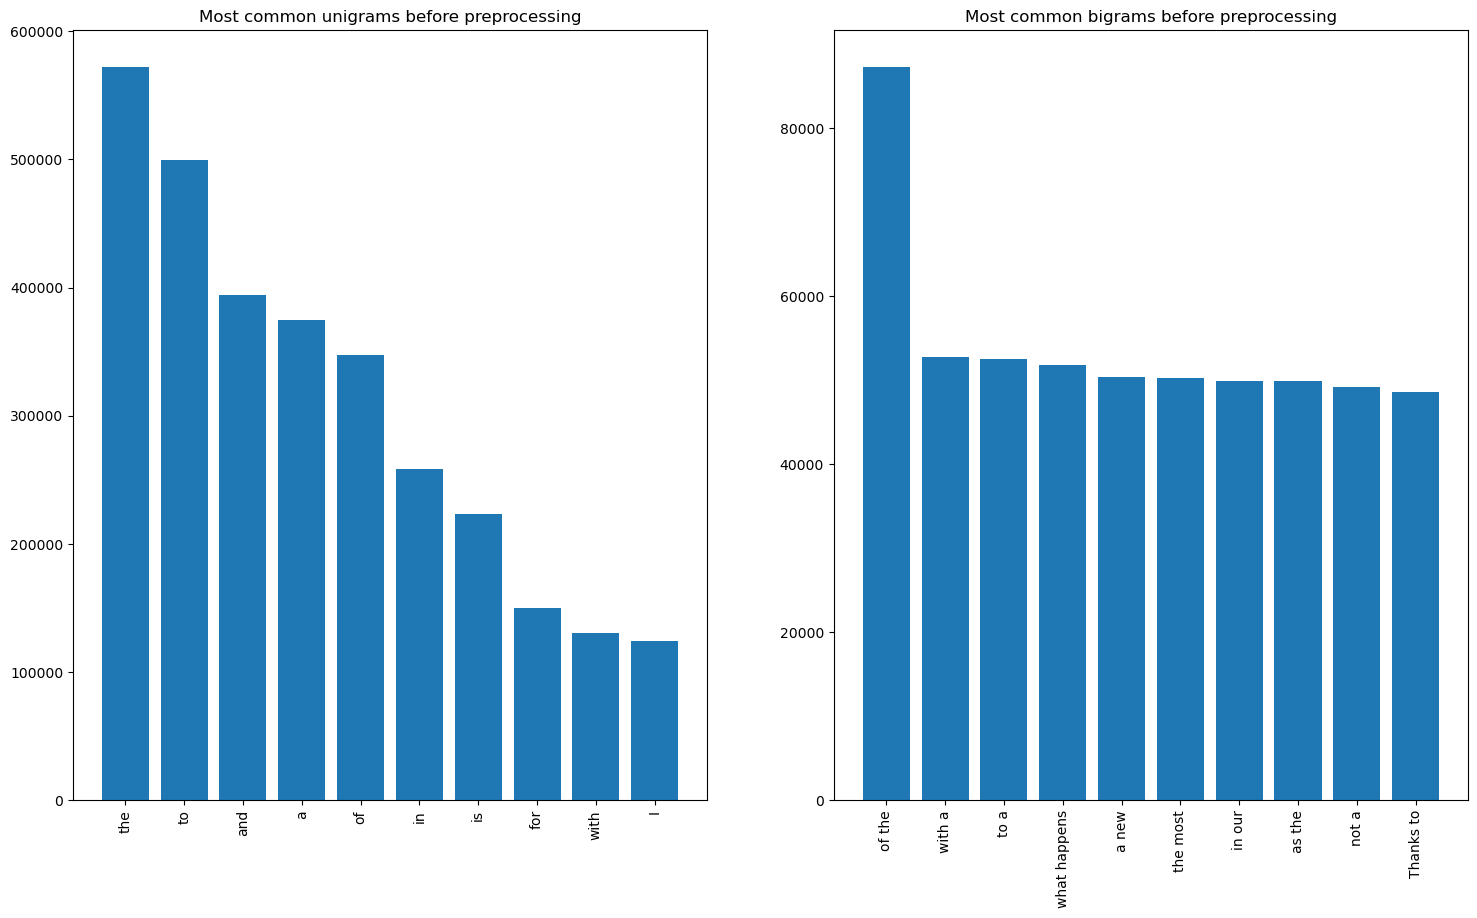

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(18, 10))
ax1.bar(unigrams, unigram_freqeuncies)
ax1.tick_params('x', labelrotation=90)
ax1.set_title("Most common unigrams before preprocessing")
ax2.bar(bigrams, bigram_freqeuncies)
ax2.tick_params('x', labelrotation=90)
ax2.set_title("Most common bigrams before preprocessing")
fig.show()

### Processing tweets

In [171]:
tweets = unprocessed_tweets.copy()

In [6]:
import copy
unprocessed_tweets = copy.deepcopy(tweets)

In [7]:
preprocess(tweets, flags={'to_lower': True, 'remove_punctuation': True, 'simplify_haha': True, 'tokenize': True, 'replace_abbreviations': True, 'replace_emoticons': True, 'replace_user_handles': True, 'remove_stopwords': True, 'lemmatize': True, 'remove_single_symbols': True, 'spelling_correction': False, 'replace_urls': True, "remove_tag_tokens":True})

# Plotting processed data

In [79]:
def plot_most_commmon_uni_and_bigrams(tweets, fraction):
    text_bigrams = [ngrams(sent, 2) for sent in tweets["x"]]
    text_unigrams = [ngrams(sent, 1) for sent in tweets["x"]]

    unigram_counter = Counter()
    bigram_counter = Counter()

    for sentence in text_unigrams:
        for unigram in sentence:
            unigram_counter.update(unigram)

    for sentence in text_bigrams:
        for bigram in sentence:
            bigram_counter.update([bigram])

    most_common_unigrams = unigram_counter.most_common(10)
    most_common_bigrams = bigram_counter.most_common(10)

    unigrams, unigram_freqeuncies = list(zip(*most_common_unigrams))
    bigrams, bigram_freqeuncies = list(zip(*most_common_bigrams))
    bigrams = [" ".join(bigram) for bigram in bigrams]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(18, 7))
    ax1.bar(unigrams, unigram_freqeuncies)
    ax1.tick_params('x', labelrotation=90)
    ax1.set_title(f"Most common unigrams in {fraction} tweets")
    ax2.bar(bigrams, bigram_freqeuncies)
    ax2.tick_params('x', labelrotation=90)
    ax2.set_title(f"Most common bigrams in {fraction} tweets")
    fig.show()

/tmp/ipykernel_388197/1960101914.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


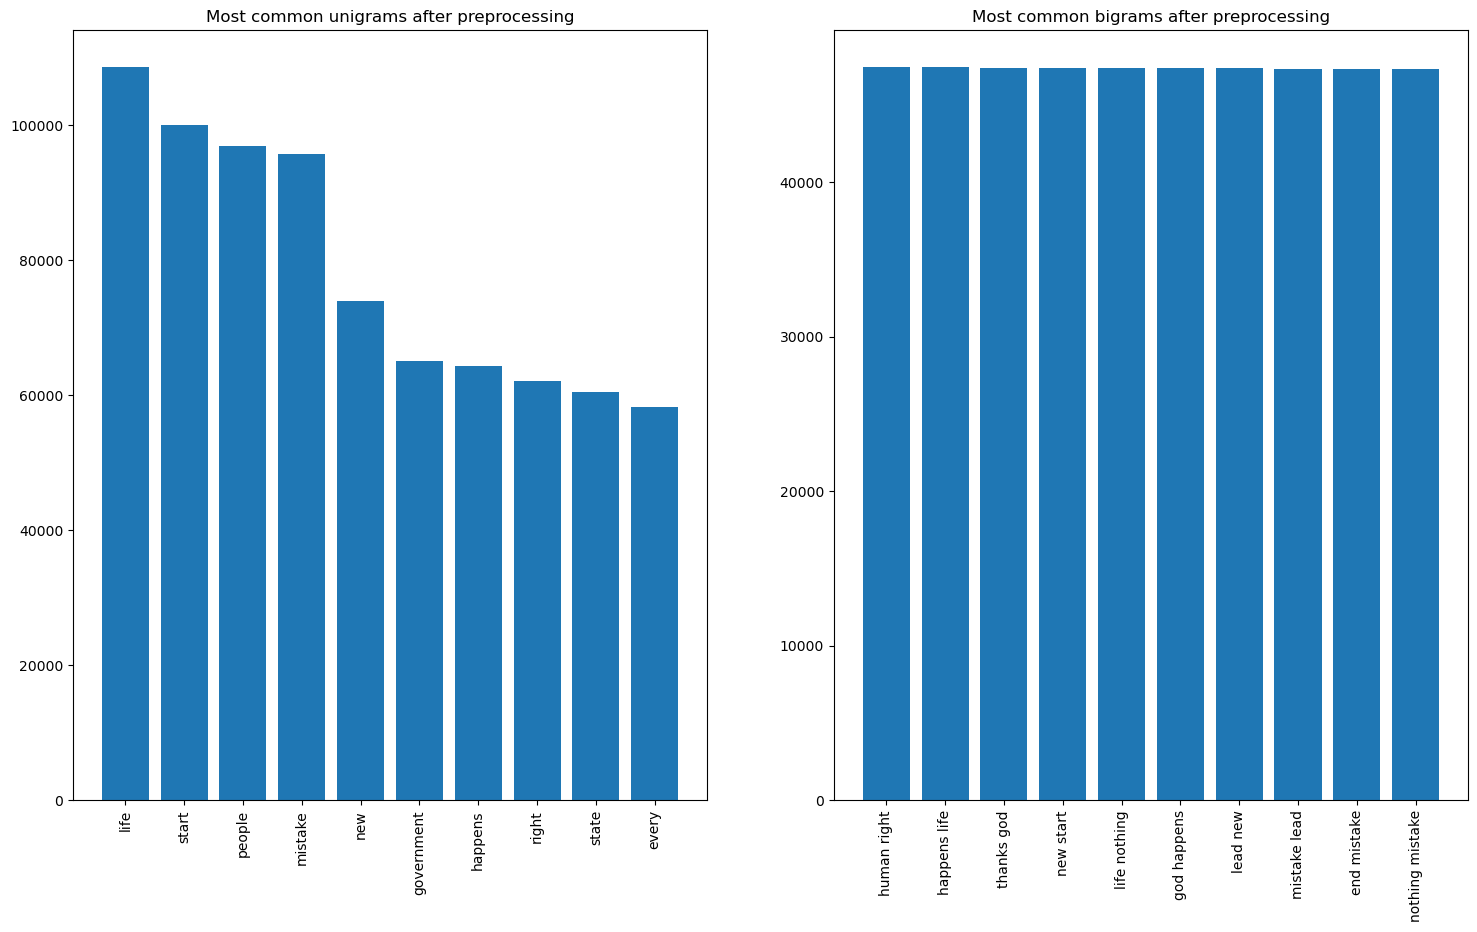

In [63]:
plot_most_commmon_uni_and_bigrams(tweets)

In [68]:
positive_tweets = tweets[tweets['pos'].astype(int) >= 3]
negative_tweets = tweets[tweets['neg'].astype(int) <= -3]
neutral_tweets = tweets[(tweets['pos'].astype(int) < 3) & (tweets['neg'].astype(int) > -3)]

/tmp/ipykernel_388197/950929139.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


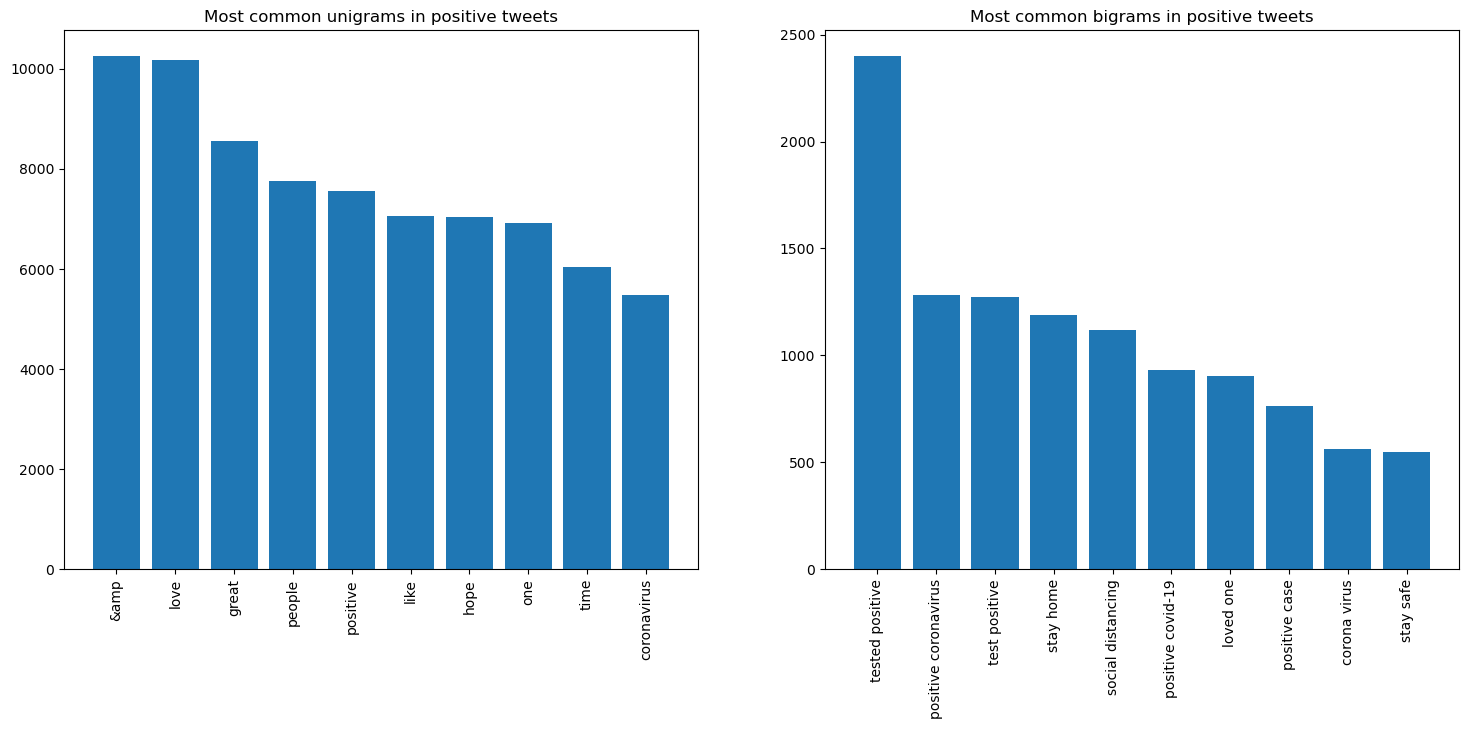

In [80]:
plot_most_commmon_uni_and_bigrams(positive_tweets, "positive")

/tmp/ipykernel_388197/950929139.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


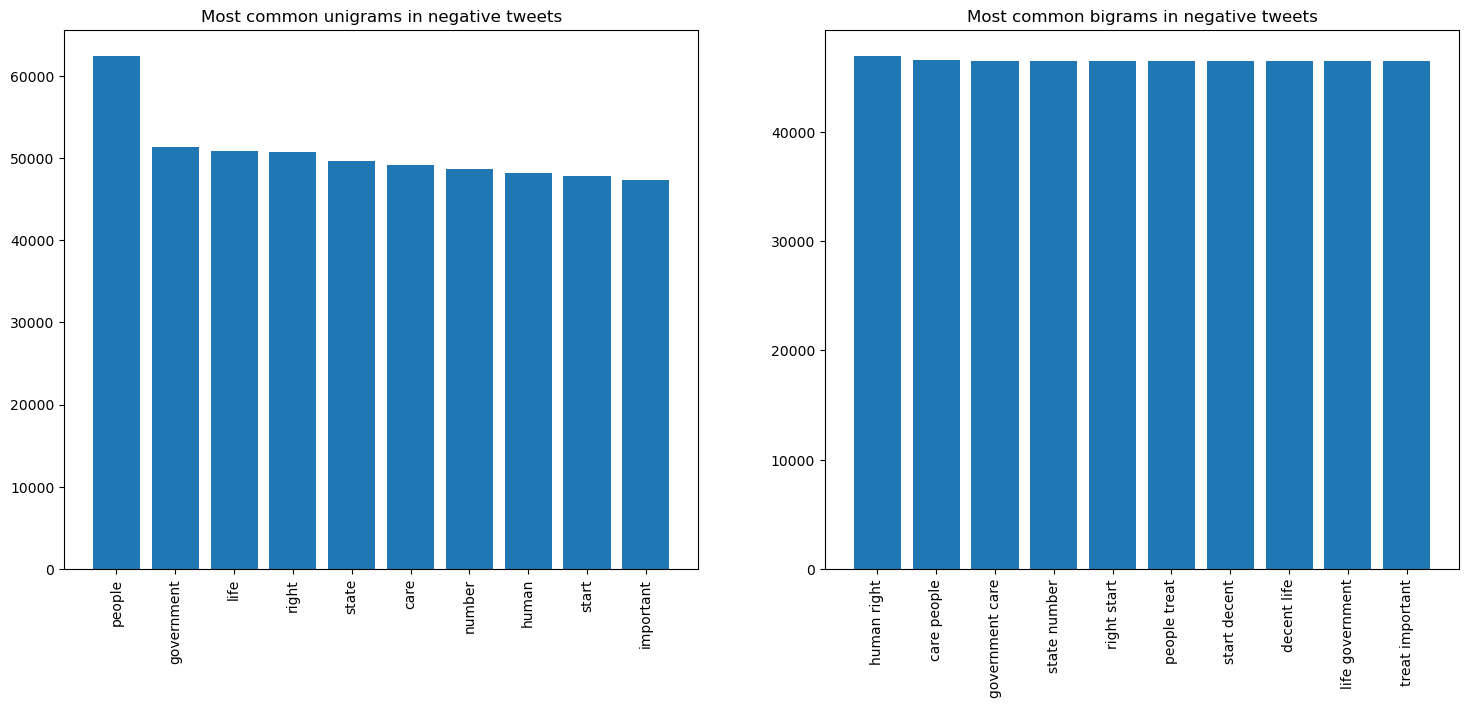

In [81]:
plot_most_commmon_uni_and_bigrams(negative_tweets, "negative")

/tmp/ipykernel_388197/950929139.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


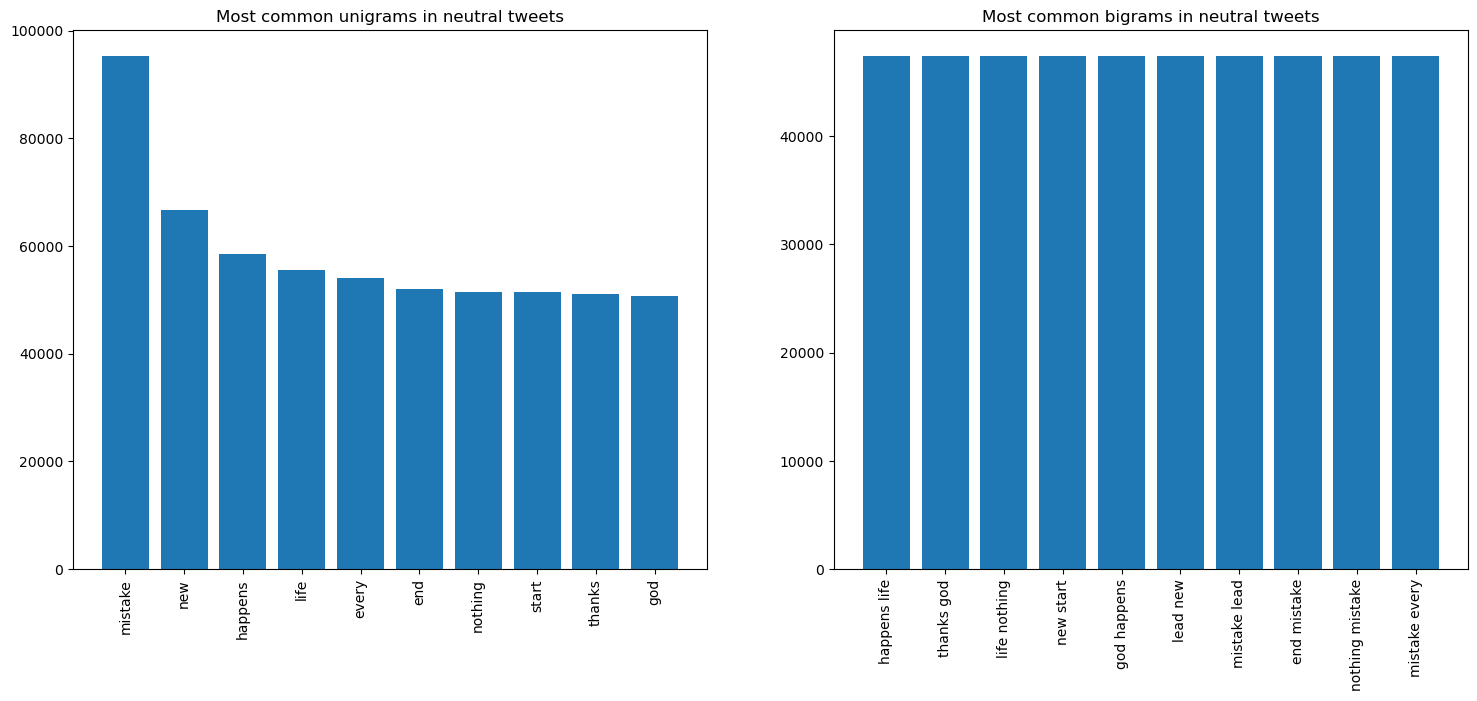

In [82]:
plot_most_commmon_uni_and_bigrams(neutral_tweets, "neutral")

### Finding distributions of positive and negative labels

In [14]:
import matplotlib.pyplot as plt

In [45]:
positive_counter = Counter()
negative_counter = Counter()

for i, row in tweets.iterrows():
    if row['pos'] not in [1,2,3,4,5,'1','2','3','4','5']:
        print(row['Sentiment'])
    positive_counter.update([int(row['pos'])])
    negative_counter.update([int(row['neg'])])


In [47]:
counts = []
for i in range(1,6):
    counts.append(positive_counter[i]+negative_counter[-i])

In [49]:
total = sum(counts)
weights = [float(total)/count for count in counts]
weights

[1.8674969479696222,
 3.4763250410496354,
 7.115824298553382,
 28.9821053083294,
 547.0797893884163]

Text(0.5, 1.0, 'Distribution of positive and negative labels separately')

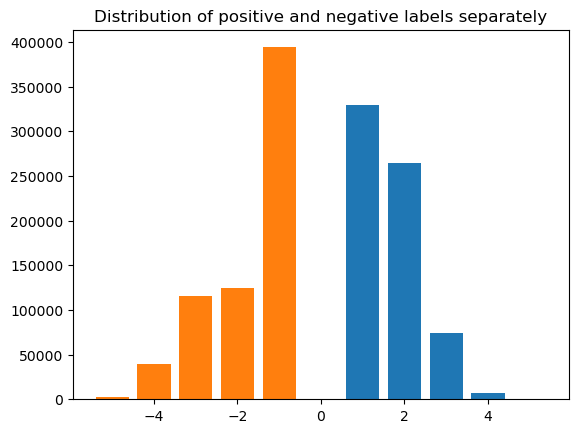

In [89]:

plt.bar(list(positive_counter.keys()), list(positive_counter.values()))
plt.bar(list(negative_counter.keys()), list(negative_counter.values()))
plt.title("Distribution of positive and negative labels separately")

In [88]:
combo_counter = Counter()
for i, row in tweets.iterrows():
    combo_counter.update([row['Sentiment']])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '1 -1'),
  Text(1, 0, '2 -1'),
  Text(2, 0, '2 -2'),
  Text(3, 0, '2 -3'),
  Text(4, 0, '3 -1'),
  Text(5, 0, '1 -2'),
  Text(6, 0, '1 -3'),
  Text(7, 0, '1 -4'),
  Text(8, 0, '2 -4'),
  Text(9, 0, '3 -2'),
  Text(10, 0, '3 -3'),
  Text(11, 0, '3 -4'),
  Text(12, 0, '4 -1'),
  Text(13, 0, '1 -5'),
  Text(14, 0, '4 -2'),
  Text(15, 0, '4 -3'),
  Text(16, 0, '2 -5'),
  Text(17, 0, '4 -4'),
  Text(18, 0, '3 -5'),
  Text(19, 0, '5 -1'),
  Text(20, 0, '4 -5'),
  Text(21, 0, '5 -3'),
  Text(22, 0, '5 -2'),
  Text(23, 0, '5 -4'),
  Text(24, 0, '5 -5')])

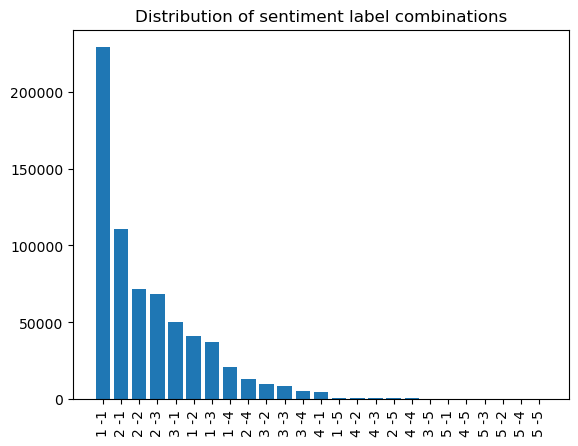

In [94]:
plt.bar(*list(zip(*combo_counter.most_common(25))))
plt.title("Distribution of sentiment label combinations")
plt.xticks(rotation=90)

Dataset highly imbalanced in regards to the labels.
Metrics - area under ROC curve, area under PR curve, accuracy

Stratify tweets by date, location, pos and neg

In [8]:
from sklearn.model_selection import train_test_split
def split_data(tweets):
    train_tweets, test_tweets, train_pos, test_pos, train_neg, test_neg, _, test_strat = train_test_split(tweets['x'], tweets['pos'], tweets['neg'], tweets['strat'], test_size=0.2, random_state=42, stratify=tweets[['strat']])
    val_tweets, test_tweets, val_pos, test_pos, val_neg, test_neg = train_test_split(test_tweets, test_pos, test_neg, test_size=0.5, random_state=42, stratify=test_strat)
    return train_tweets, val_tweets, test_tweets, train_pos, val_pos, test_pos, train_neg, val_neg, test_neg

# Part 2


### VADER

vader - removing emoticons and replacing slang is not necessarily necessary, removing punctuation could even reduce performance, capitalization as well

In [103]:
vader_tweets = copy.deepcopy(unprocessed_tweets)
preprocess(vader_tweets, flags={'to_lower': False, 'remove_punctuation': False, 'simplify_haha': False, 'tokenize': False, 'replace_abbreviations': False, 'replace_emoticons': False, 'remove_tag_tokens': False, 'remove_stopwords': False, 'lemmatize': False, 'remove_single_symbols': False, 'spelling_correction': False})

In [104]:
train_tweets, val_tweets, test_tweets, train_pos, val_pos, test_pos, train_neg, val_neg, test_neg = split_data(vader_tweets)

In [105]:
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
inferred_pos = []
inferred_neg = []
for tweet in tqdm(test_tweets):
    scores = analyzer.polarity_scores(tweet)
    inferred_pos.append(scores['pos'])
    inferred_neg.append(scores['neg'])
    #normalising scores so that they are in range 1-5 and -1 to -5
    inferred_pos[-1] = int(round(inferred_pos[-1]*4)) + 1
    inferred_neg[-1] = int(round(inferred_neg[-1]*-4)) - 1


100%|██████████| 67537/67537 [00:10<00:00, 6487.18it/s]


In [107]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
def evaluate_model(true_pos, true_neg, inferred_pos, inferred_neg):
    print("Accuracy_pos: ", accuracy_score(true_pos, inferred_pos))
    print("Accuracy_neg: ", accuracy_score(true_neg, inferred_neg))
    print("F1_pos: ", f1_score(true_pos, inferred_pos, average='macro'))
    print("F1_neg: ", f1_score(true_neg, inferred_neg, average='macro'))
    inferred_pos_oh = pd.get_dummies(inferred_pos)
    inferred_neg_oh = pd.get_dummies(inferred_neg)
    print("AUC_pos: ", roc_auc_score(true_pos, inferred_pos_oh, multi_class='ovr', average='macro'))
    print("AUC_neg: ", roc_auc_score(true_neg, inferred_neg_oh, multi_class='ovr', average='macro'))

In [108]:
test_pos = test_pos.astype(int)
test_neg = test_neg.astype(int)
evaluate_model(list(test_pos), list(test_neg), inferred_pos, inferred_neg)

Accuracy_pos:  0.6871936864237381
Accuracy_neg:  0.5579015946814339
F1_pos:  0.31780071496593576
F1_neg:  0.2075352761446719
AUC_pos:  0.6060882212681158
AUC_neg:  0.5307147737133774


## Embeddings

### Bag of words

In [9]:
train_tweets, val_tweets, test_tweets, train_pos, val_pos, test_pos, train_neg, val_neg, test_neg = split_data(tweets)

In [116]:
len(train_tweets), len(val_tweets), len(test_tweets)

(540296, 67537, 67537)

In [117]:
word_counter = Counter()

for tweet in list(train_tweets) + list(val_tweets):
    for word in tweet:
        word_counter.update([word])


In [118]:

#words with more than 5 occurences
vocab = [word for word, count in word_counter.items() if count > 5]
print(len(vocab))
vocab.append('UNK')

50954


In [119]:
def bow_encode(tweet, vocab):
    encoded = [0]*len(vocab)
    for word in tweet:
        if word in vocab:
            encoded[vocab.index(word)] += 1
        else:
            encoded[-1] += 1
    return encoded

### TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=len(vocab))
vectorizer.fit_transform([" ".join(tweet) for tweet in train_tweets]+[" ".join(tweet) for tweet in val_tweets])

<607833x51057 sparse matrix of type '<class 'numpy.float64'>'
	with 8710991 stored elements in Compressed Sparse Row format>

In [ ]:

encoded_train_tweets = vectorizer.transform([" ".join(tweet) for tweet in train_tweets])
encoded_val_tweets = vectorizer.transform([" ".join(tweet) for tweet in val_tweets])
encoded_test_tweets = vectorizer.transform([" ".join(tweet) for tweet in test_tweets])

### Word2Vec

went with skip-gram, can better represent rare words, works well with small datasets (according to paper authors)

In [176]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1)

In [116]:
len(w2v_model.wv['vaccine'])

100

In [177]:
import gensim.downloader
pretrained_w2v = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [179]:
pretrained_w2v.most_similar('vaccine')

KeyboardInterrupt: 

### GloVe

In [10]:
import csv
import numpy as np
def glove2dict(glove_filename):
    with open(glove_filename, encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=' ', quoting=csv.QUOTE_NONE)
        embed = {line[0]: np.array(list(map(float, line[1:])))
                    for line in reader}
    return embed

In [12]:
glove_dictionary = glove2dict('../glove.twitter.27B.200d.txt')

In [ ]:
glove_dictionary['vaccine']

### FastText

In [120]:
from gensim.models import FastText
fasttext_model = FastText(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1, epochs=15)

In [123]:
fasttext_model.wv["vaccine"]

array([ 0.01966258,  0.2165658 ,  0.21393049, -0.33521083,  0.04722314,
       -0.6253451 ,  0.3224923 , -0.06939656,  1.3086256 ,  0.5916107 ,
       -0.25102094,  0.24471909,  0.13292168, -0.11070154, -0.3331309 ,
       -0.15074897,  0.12743294, -0.33723003,  0.12242357, -0.23034333,
       -0.23550189,  0.53598464, -0.49103132,  0.06963629,  0.14073634,
        0.05840749, -0.29320297,  0.59921736,  0.53837156,  0.32364944,
        0.5677848 ,  0.41210437, -0.4599703 ,  0.15437725,  0.33981484,
       -0.7631823 , -0.05337827, -0.81435853, -0.27119678, -0.28423256,
       -0.2758534 , -0.61655027,  0.02685743, -0.47242874, -1.0156314 ,
       -0.66716844,  0.67307454,  0.3268877 , -0.72639084,  0.8979473 ,
        0.24669813, -0.02895155,  0.4400408 , -0.3026672 ,  0.3421758 ,
        0.18958321, -0.14329354, -0.53972614, -0.07128329,  1.0839355 ,
        0.0232219 , -0.85382605, -0.36922273, -0.13533896, -0.85011035,
        0.04102843,  0.34789544,  0.9195639 , -0.09619165, -0.09

## Umap visualisations

In [120]:
import umap
import umap.plot

/home/lrabuzin/.conda/envs/ML4HC/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/lrabuzin/.conda/envs/ML4HC/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/lrabuzin/.conda/envs/ML4HC/lib/python3.10/site-packages/umap/distanc

In [129]:
non_test_tweets = list(val_tweets) + list(train_tweets)
non_test_pos = list(train_pos) + list(val_pos)
non_test_neg = list(train_neg) + list(val_neg)

vaccine_tweets = [1 if 'vaccine' in tweet else 0 for tweet in non_test_tweets]
hydroxychloroquine_tweets = [1 if 'hydroxychloroquine' in tweet else 0 for tweet in non_test_tweets]
lockdown_tweets = [1 if 'lockdown' in tweet else 0 for tweet in non_test_tweets]
covid_tweets = [1 if 'covid' in tweet else 0 for tweet in non_test_tweets]
pfizer_tweets = [1 if 'pfizer' in tweet else 0 for tweet in non_test_tweets]
moderna_tweets = [1 if 'moderna' in tweet else 0 for tweet in non_test_tweets]

#take a subset of the data
_, subset_tweets, _, subset_pos, _, subset_neg, _, subset_vaccine_tweets, _, subset_hydroxychloroquine_tweets, _, subset_lockdown_tweets, _, subset_covid_tweets, _, subset_pfizer_tweets, _, subset_moderna_tweets = train_test_split(non_test_tweets, non_test_pos, non_test_neg, vaccine_tweets, hydroxychloroquine_tweets, lockdown_tweets, covid_tweets, pfizer_tweets, moderna_tweets, test_size=0.005, random_state=69)

In [130]:
len(subset_tweets)

3040

In [131]:
subset_pos

['2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '3',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '3',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '3',
 '1',
 '1',
 '2',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '3',
 '2',
 '3',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '3',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '3',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '3',
 '2',
 '1',
 '4',
 '2',
 '1',
 '2',
 '3',
 '1',
 '1',
 '3',
 '2',
 '2',
 '1',
 '2',
 '4',
 '1',
 '2',
 '1',
 '1',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '2',
 '1',
 '3',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '3',
 '2',
 '3',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1'

### Bag of words visualisation

In [132]:
import numpy as np

In [133]:
embeddings = []
for tweet in tqdm(subset_tweets):
    embeddings.append(bow_encode(tweet, vocab))


100%|██████████| 3040/3040 [00:36<00:00, 83.35it/s] 


In [134]:
embedding_array = np.array(embeddings)

In [48]:
embedding_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       [2, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
embedding_array.shape

(3377, 51057)

In [140]:
umap_embedding = umap.UMAP(metric="cosine", init='random', random_state=69).fit(embedding_array)


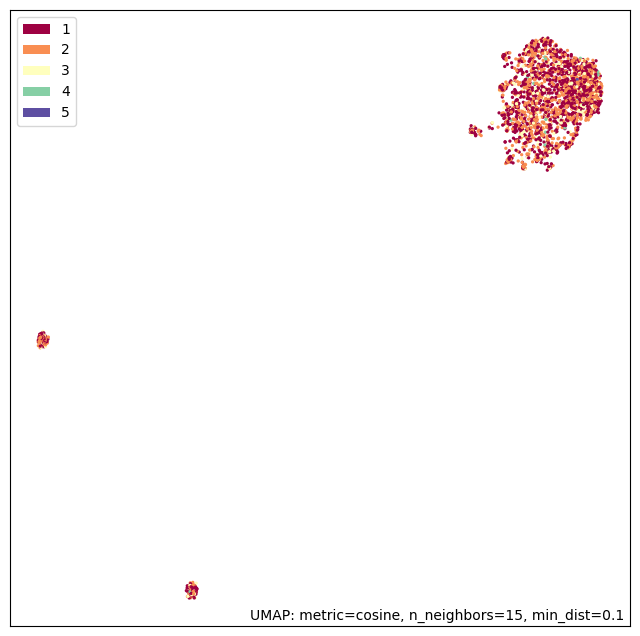

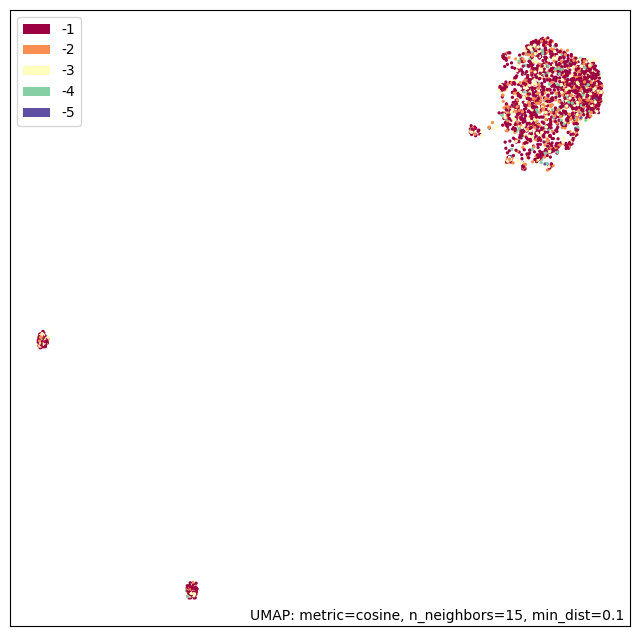

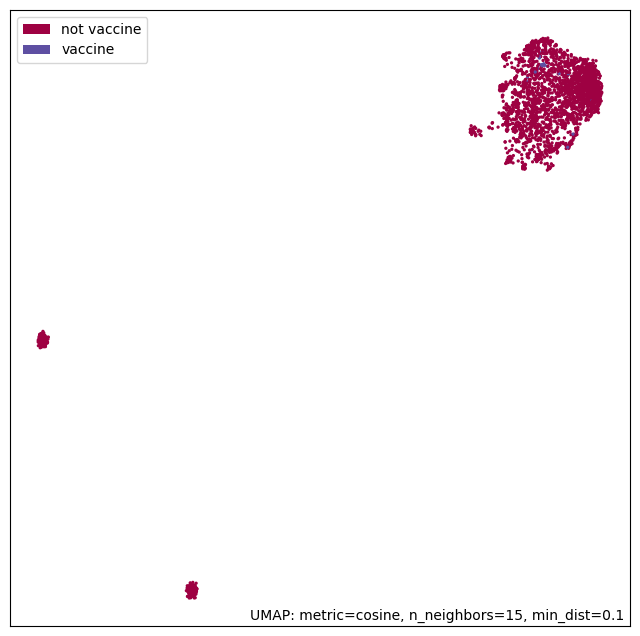

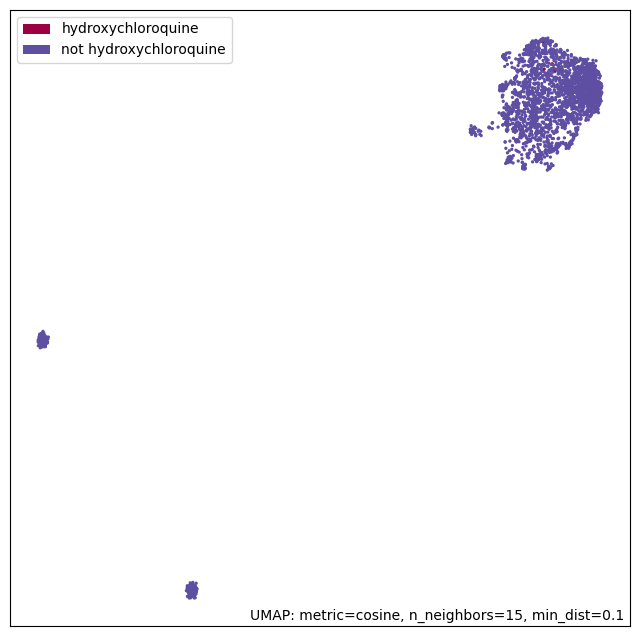

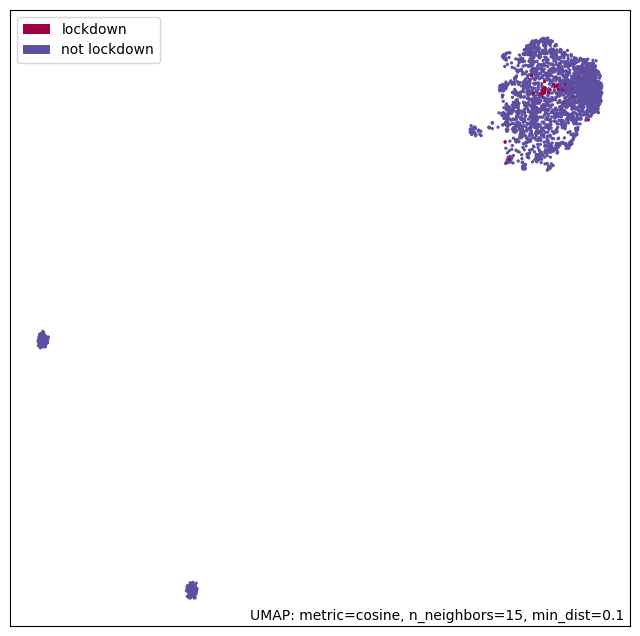

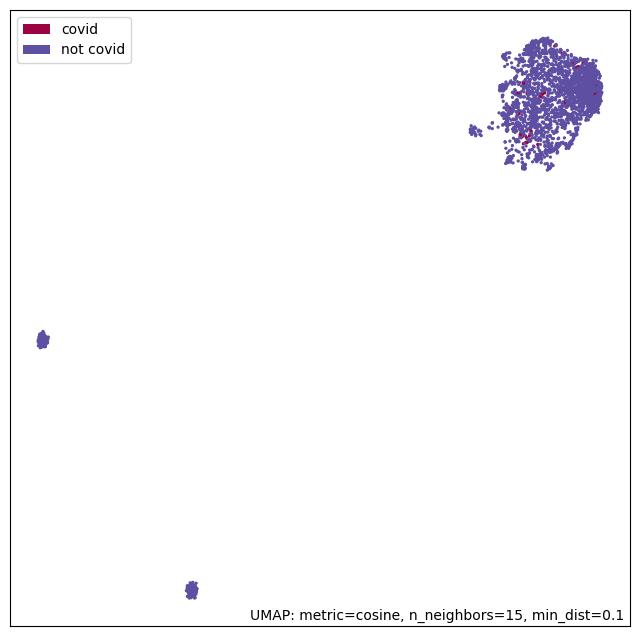

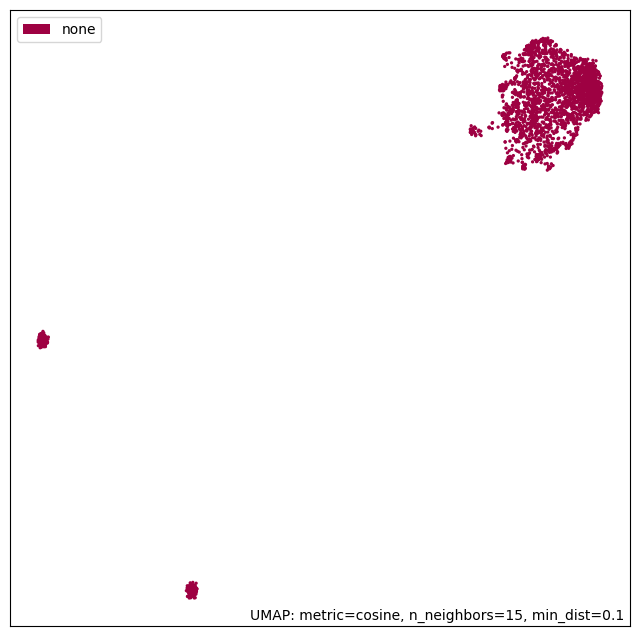

In [141]:
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

In [157]:
from sklearn.manifold import TSNE# Instantialte tsne, specify cosine metric

tsne = TSNE(random_state = 0, n_iter = 1000, metric = 'cosine', n_jobs=8)

embeddings2d = tsne.fit_transform(embedding_array)

/home/lrabuzin/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/lrabuzin/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/lrabuzin/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


/tmp/ipykernel_388197/3550557056.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


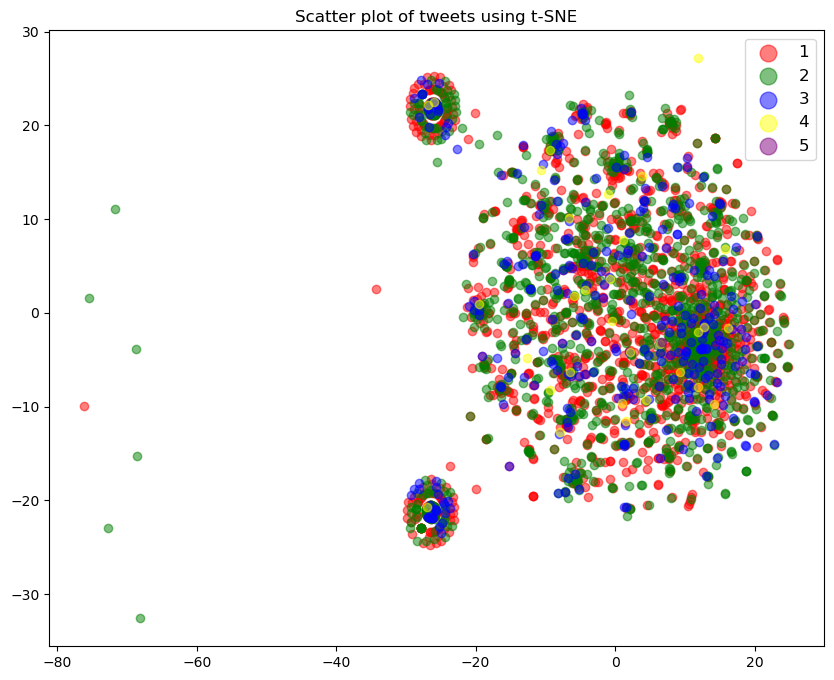

In [165]:
# Set figsize
from matplotlib import cm
cmap = cm.get_cmap('tab20')
subset_pos = np.array([int(tweet) for tweet in subset_pos])
embeddingsdf = pd.DataFrame(embeddings2d, columns=['x','y'])
fig, ax = plt.subplots(figsize=(10,8))# Scatter points, set alpha low to make points translucent
colors = ['red', 'green', 'blue', 'yellow', 'purple']
for i in range (1, 6):
    indices = subset_pos == i
    ax.scatter(embeddingsdf.x[indices], embeddingsdf.y[indices], alpha=.5, c=colors[i-1], label = i)
ax.legend(fontsize='large', markerscale=2)
plt.title('Scatter plot of tweets colored by positive sentiment')
plt.show()


### TF-IDF visualisation

In [56]:
embeddings = vectorizer.transform([" ".join(tweet) for tweet in subset_tweets])

In [59]:
umap_embedding = umap.UMAP(metric="hellinger", init='random', random_state=42).fit(embeddings)

/home/lrabuzin/.conda/envs/genomics/lib/python3.10/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 6397392 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


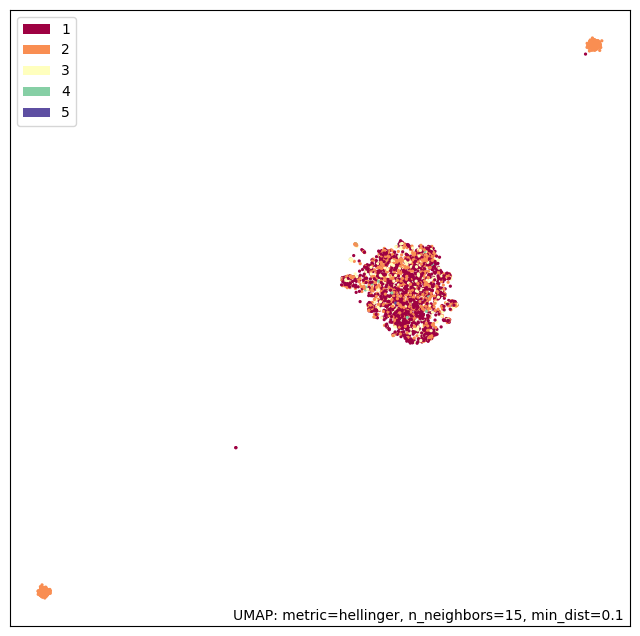

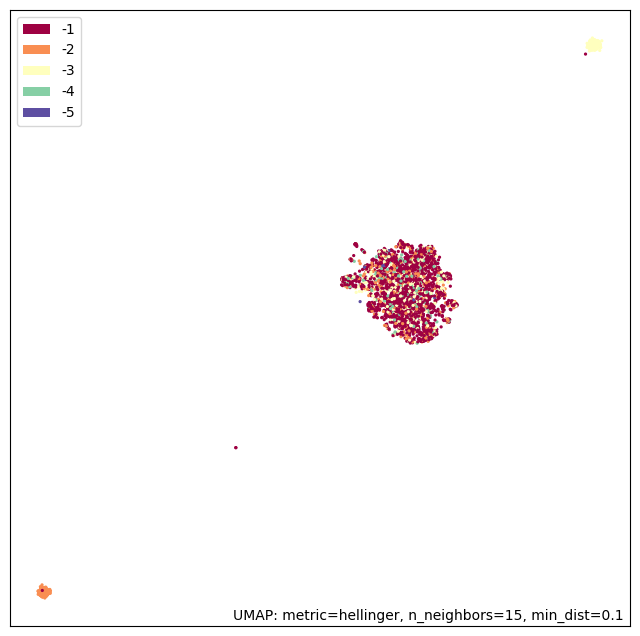

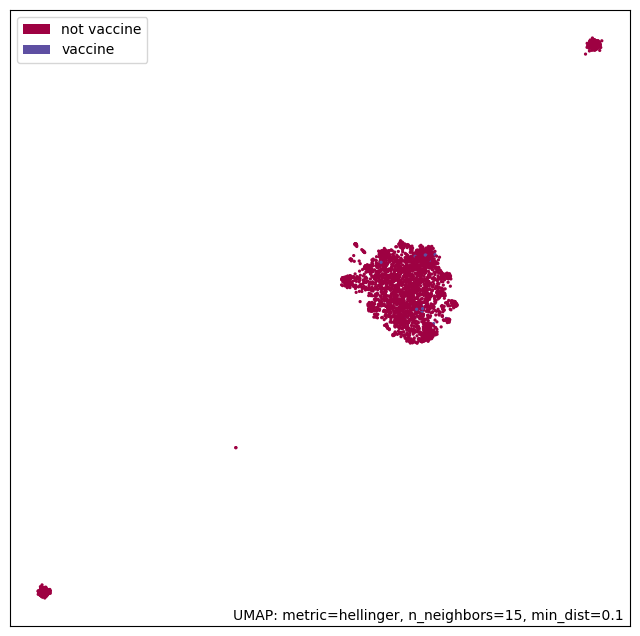

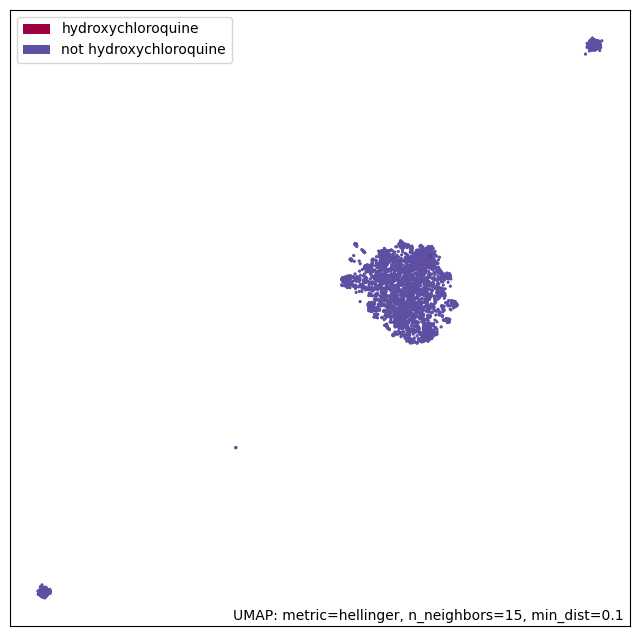

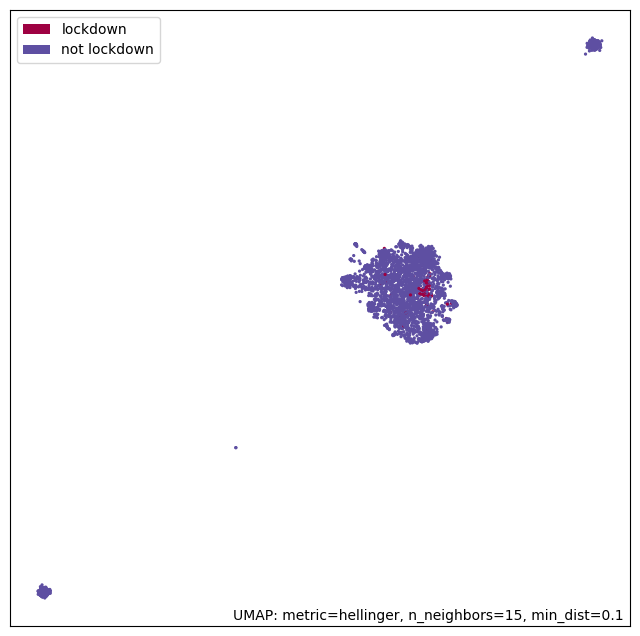

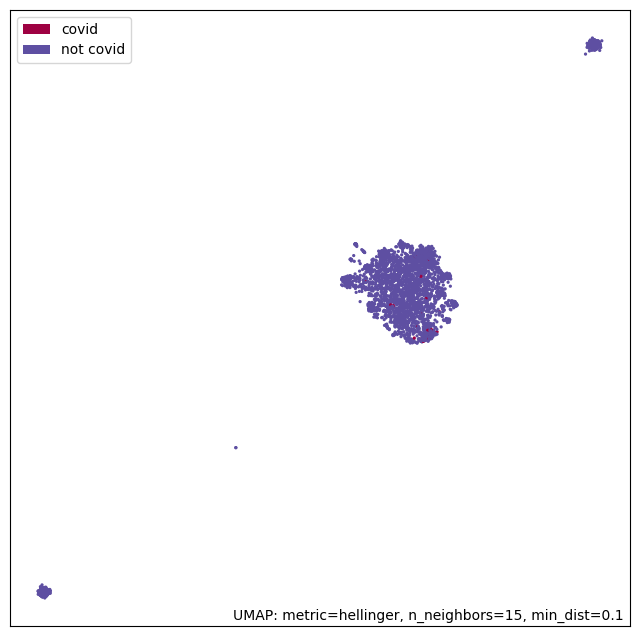

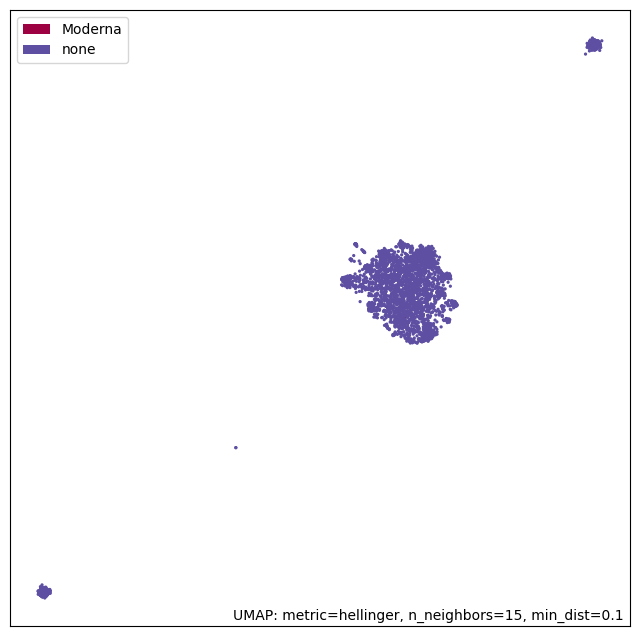

In [60]:
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

### Word2Vec visualization

In [61]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1)
embeddings = []
for tweet in tqdm(subset_tweets):
    word_embeddings = []
    for word in tweet:
        word_embeddings.append(w2v_model.wv[word] if word in w2v_model.wv else np.zeros(100))
    word_embeddings = np.array(word_embeddings)
    embeddings.append(np.mean(word_embeddings, axis=0))

In [66]:
embedding_array = np.array(embeddings)

In [68]:
umap_embedding = umap.UMAP(init='random', random_state=42).fit(embedding_array)

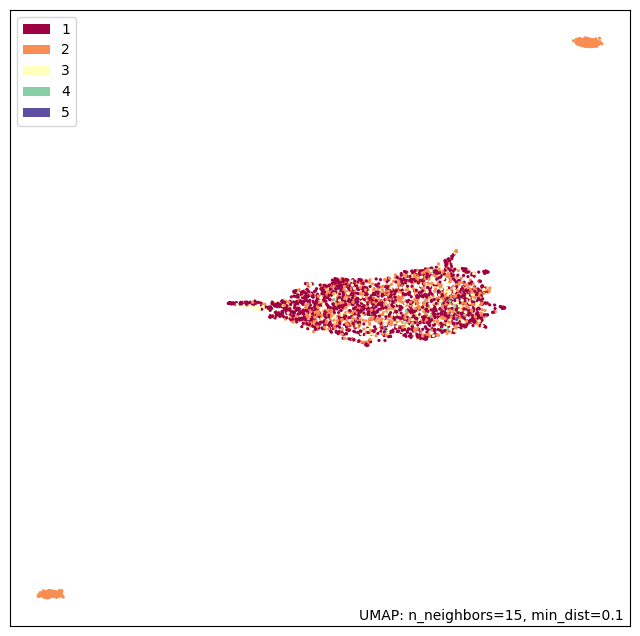

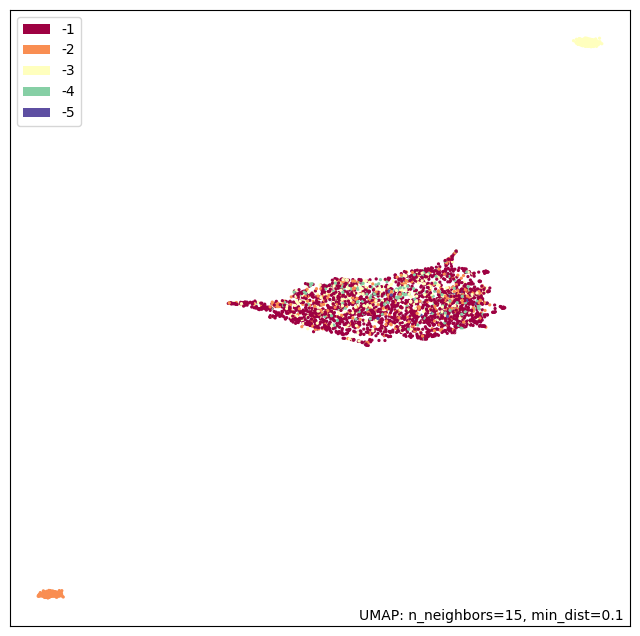

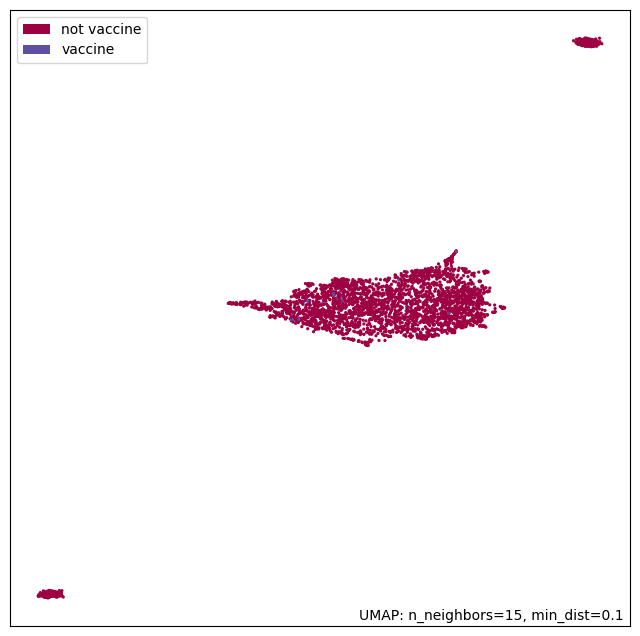

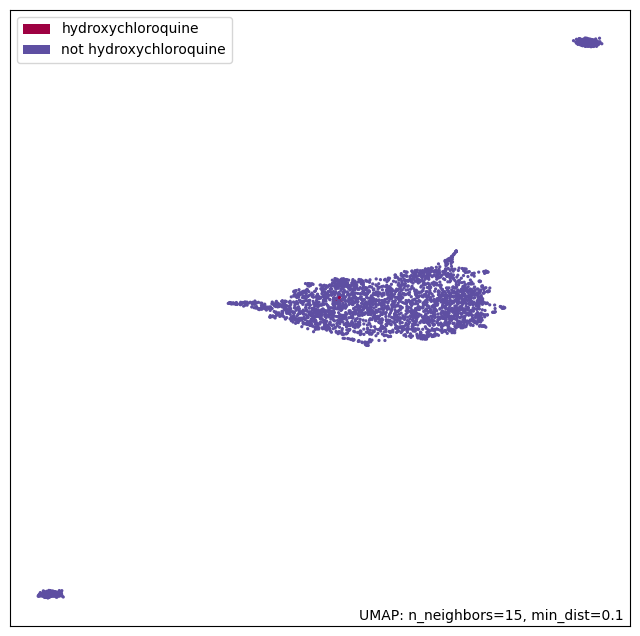

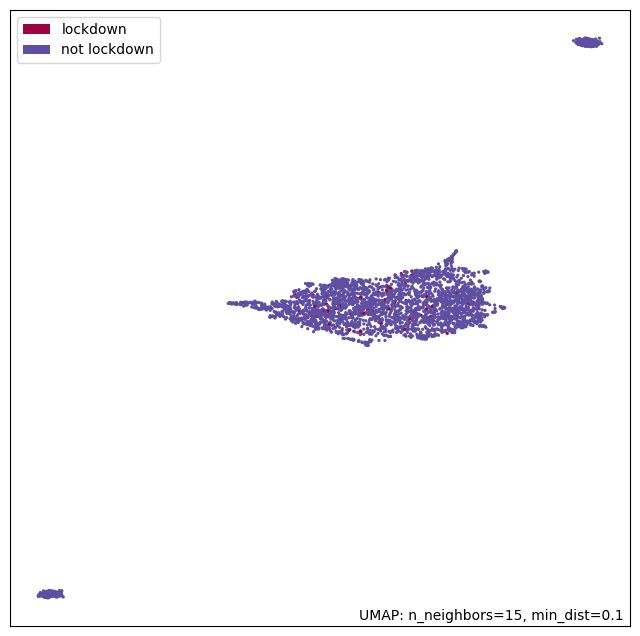

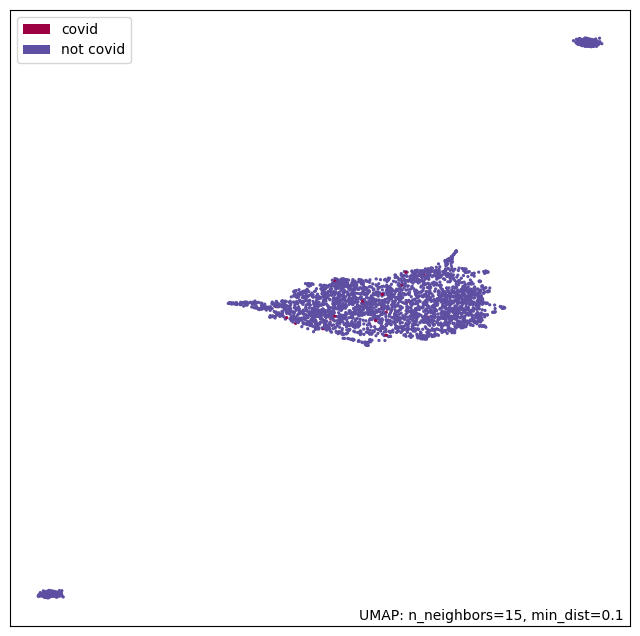

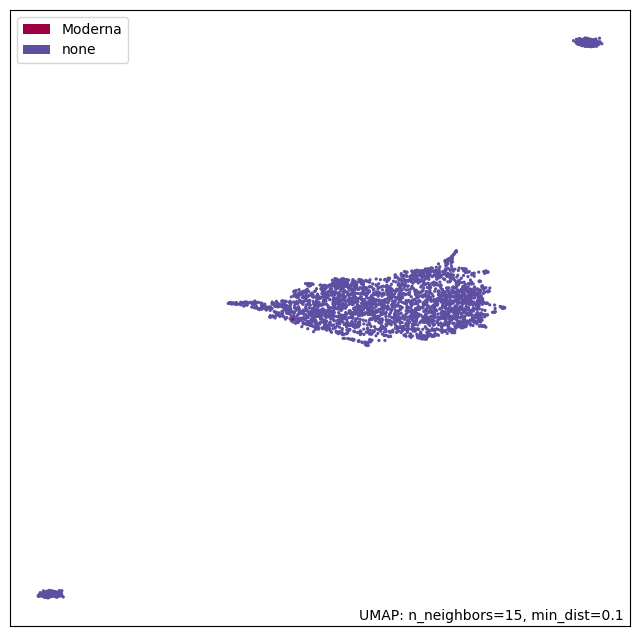

In [69]:
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

### GloVe visualisation

In [70]:
import csv
import numpy as np
def glove2dict(glove_filename):
    with open(glove_filename, encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=' ', quoting=csv.QUOTE_NONE)
        embed = {line[0]: np.array(list(map(float, line[1:])))
                    for line in reader}
    return embed
glove_dictionary = glove2dict('glove.twitter.27B.200d.txt')
embeddings = []
for tweet in tqdm(subset_tweets):
    word_embeddings = []
    for word in tweet:
        word_embeddings.append(glove_dictionary.get(word, np.zeros(200)))
    word_embeddings = np.array(word_embeddings)
    embeddings.append(np.mean(word_embeddings, axis=0))

In [73]:
embedding_array = np.array(embeddings)
umap_embedding = umap.UMAP(init='random', random_state=42).fit(embedding_array)
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

### FastText visualisation

In [82]:
from gensim.models import FastText
fasttext_model = FastText(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1, epochs=15)
embeddings = []
for tweet in tqdm(subset_tweets):
    word_embeddings = []
    for word in tweet:
        word_embeddings.append(fasttext_model.wv[word] if word in fasttext_model.wv else np.zeros(100))
    word_embeddings = np.array(word_embeddings)
    embeddings.append(np.mean(word_embeddings, axis=0))

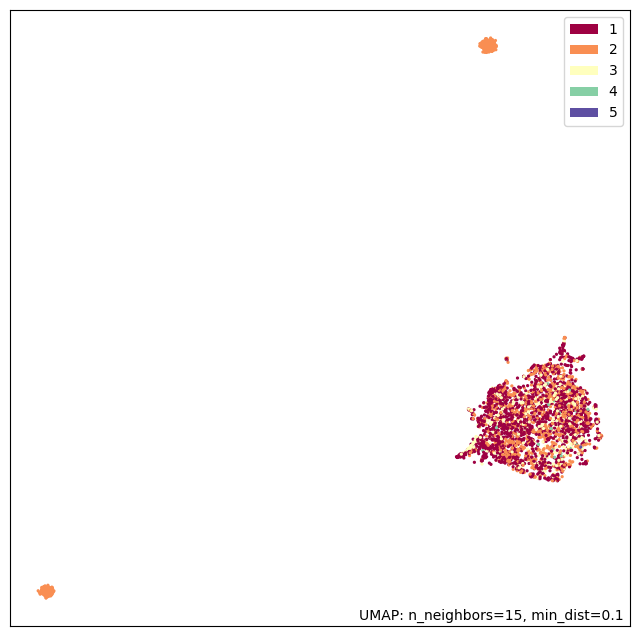

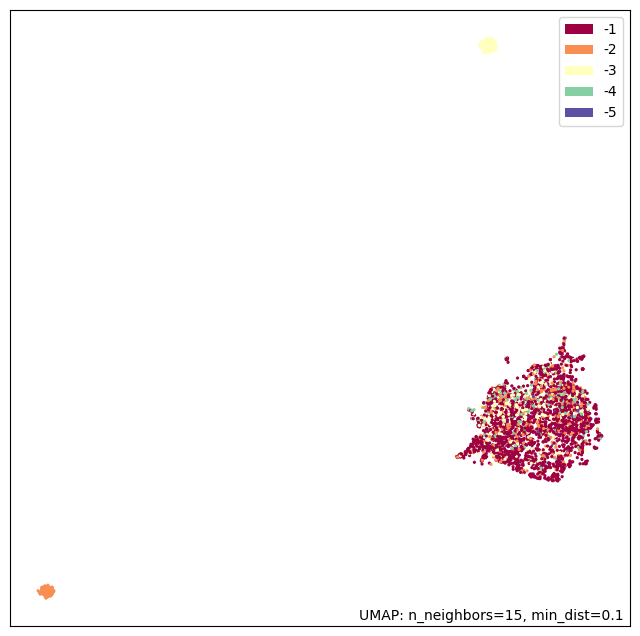

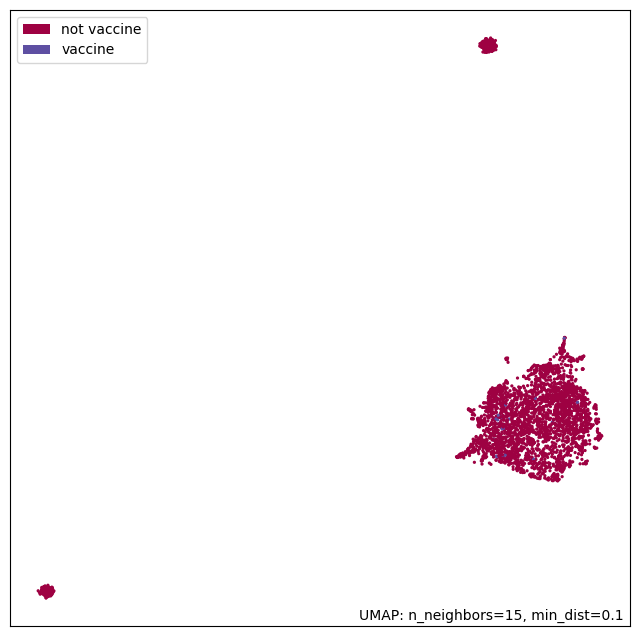

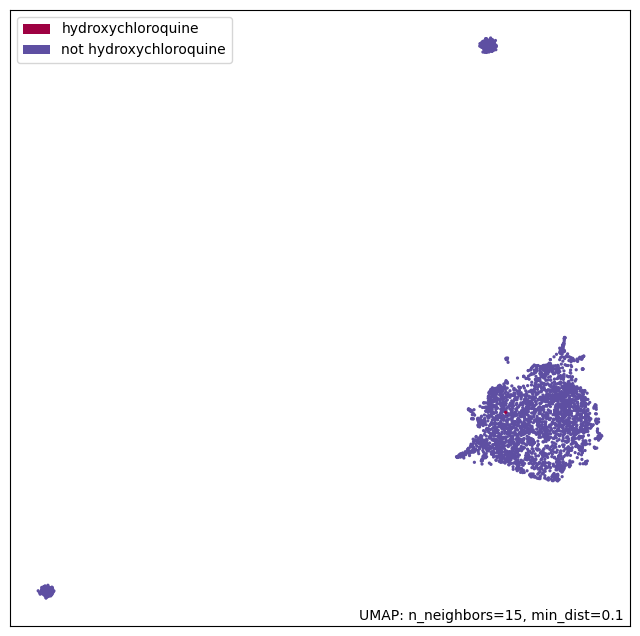

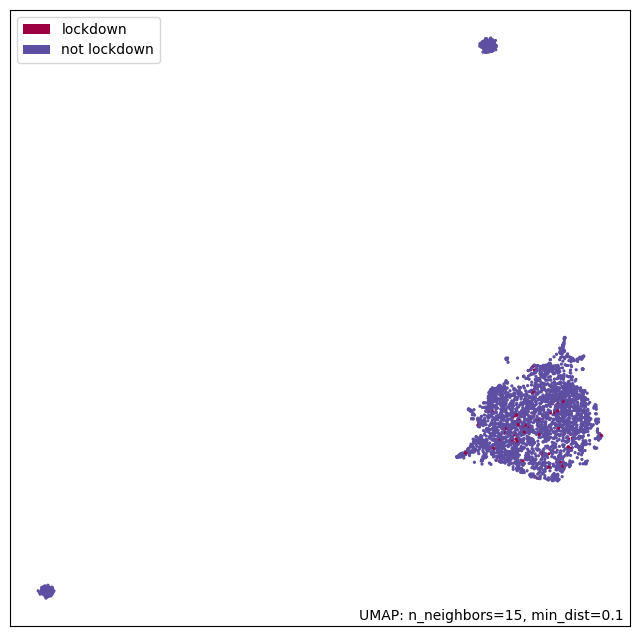

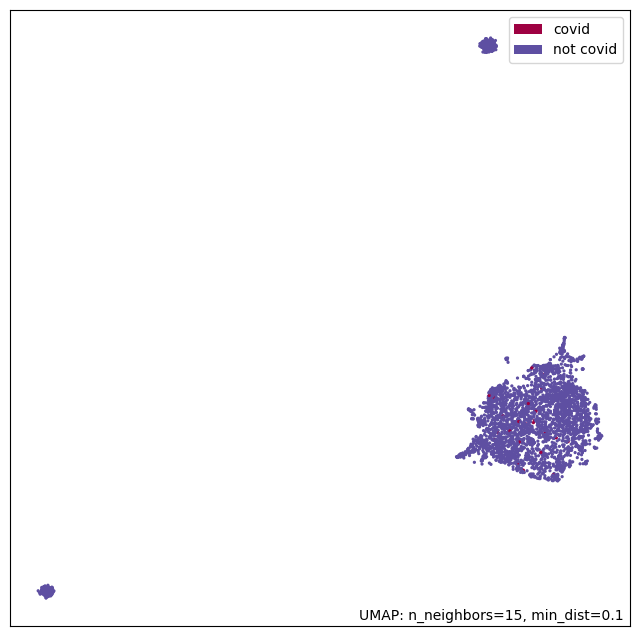

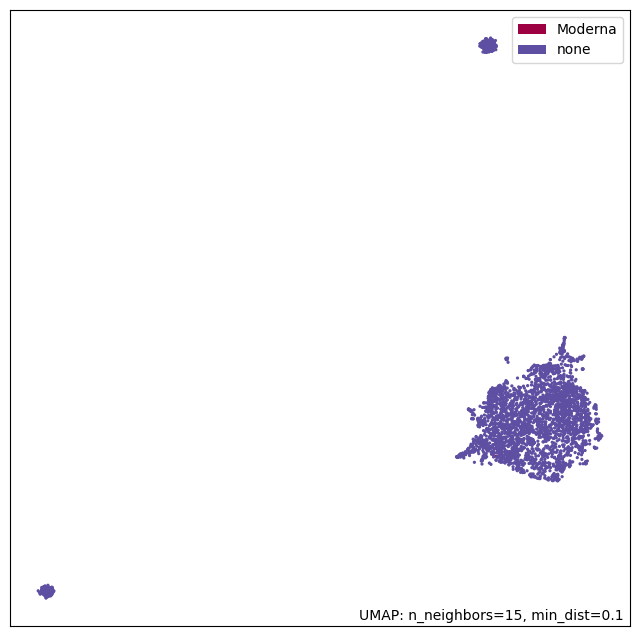

In [84]:
embedding_array = np.array(embeddings)
umap_embedding = umap.UMAP(init='random', random_state=42).fit(embedding_array)
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

## Tweet embeddings

1. Mean of all word embeddings in the tweet
2. Sum of all word embeddings normalised to have length one
3. Tf-idf weighted mean

## Classifiers

1. SVM
2. MLP
3. BiLSTM

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5, stop_words='english')
word_doc_matrix = vectorizer.fit_transform([" ".join(tweet) for tweet in list(train_tweets) + list(val_tweets)])

In [14]:
bow_train_embeddings = vectorizer.transform([" ".join(tweet) for tweet in train_tweets])
bow_val_embeddings = vectorizer.transform([" ".join(tweet) for tweet in val_tweets])
bow_test_embeddings = vectorizer.transform([" ".join(tweet) for tweet in test_tweets])

In [15]:
len(vectorizer.vocabulary_)

47914

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, stop_words='english')
vectorizer.fit_transform([" ".join(tweet) for tweet in train_tweets]+[" ".join(tweet) for tweet in val_tweets])

<607833x47914 sparse matrix of type '<class 'numpy.float64'>'
	with 7759825 stored elements in Compressed Sparse Row format>

In [17]:
tfidf_train_embeddings = vectorizer.transform(tqdm([" ".join(tweet) for tweet in train_tweets]))
tfidf_val_embeddings = vectorizer.transform(tqdm([" ".join(tweet) for tweet in val_tweets]))
tfidf_test_embeddings = vectorizer.transform(tqdm([" ".join(tweet) for tweet in test_tweets]))

100%|██████████| 67537/67537 [00:00<00:00, 82195.17it/s]


In [14]:
mean_strategy = lambda x: np.mean(x, axis=0)
def normalized(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)
sum_strategy = lambda x: normalized(x.sum(axis=0))

In [19]:
import numpy as np

In [20]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1)
def make_word2vec_embeddings(tweets, strategy):
    embeddings = []
    for tweet in tqdm(tweets):
        word_embeddings = []
        for word in tweet:
            word_embeddings.append(w2v_model.wv[word] if word in w2v_model.wv else np.zeros(100))
        word_embeddings = np.array(word_embeddings)
        embeddings.append(strategy(word_embeddings))
    return np.array(embeddings)

mean_w2v_train_embeddings = make_word2vec_embeddings(train_tweets, mean_strategy)
mean_w2v_val_embeddings = make_word2vec_embeddings(val_tweets, mean_strategy)
mean_w2v_test_embeddings = make_word2vec_embeddings(test_tweets, mean_strategy)

sum_w2v_train_embeddings = make_word2vec_embeddings(train_tweets, sum_strategy)
sum_w2v_val_embeddings = make_word2vec_embeddings(val_tweets, sum_strategy)
sum_w2v_test_embeddings = make_word2vec_embeddings(test_tweets, sum_strategy)

100%|██████████| 67537/67537 [00:03<00:00, 17701.91it/s]


In [191]:
import csv
import numpy as np
def glove2dict(glove_filename):
    with open(glove_filename, encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=' ', quoting=csv.QUOTE_NONE)
        embed = {line[0]: np.array(list(map(float, line[1:])))
                    for line in reader}
    return embed
glove_dictionary = glove2dict('../glove.twitter.27B.200d.txt')


100%|██████████| 540296/540296 [00:36<00:00, 14948.28it/s]
/tmp/ipykernel_388197/1877857058.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(embeddings)
100%|██████████| 67537/67537 [00:02<00:00, 25069.86it/s]


(200,)

In [15]:

def make_glove_embeddings(tweets, strategy):
    embeddings = []
    for tweet in tqdm(tweets):
        if tweet == []:
            embeddings.append(np.zeros(200))
            continue
        word_embeddings = []
        for word in tweet:
            word_embeddings.append(glove_dictionary.get(word, np.zeros(200)))
        word_embeddings = np.array(word_embeddings)
        # print(np.shape(word_embeddings))
        if (np.shape(strategy(word_embeddings)) != (200,)):
            print(tweet)
            print(np.shape(word_embeddings))
            print(np.shape(strategy(word_embeddings)))
        embeddings.append(strategy(word_embeddings))

        # print(np.shape(embeddings)[-1])
    return embeddings

mean_glove_train_embeddings = make_glove_embeddings(train_tweets, mean_strategy)
mean_glove_val_embeddings = make_glove_embeddings(val_tweets, mean_strategy)
mean_glove_test_embeddings = make_glove_embeddings(test_tweets, mean_strategy)

# sum_glove_train_embeddings = make_glove_embeddings(train_tweets, sum_strategy)
# sum_glove_val_embeddings = make_glove_embeddings(val_tweets, sum_strategy)
# sum_glove_test_embeddings = make_glove_embeddings(test_tweets, sum_strategy)

100%|██████████| 67537/67537 [00:02<00:00, 24686.49it/s]


In [215]:
np.shape(mean_glove_train_embeddings)

/home/lrabuzin/.conda/envs/ML4HC/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(540296,)

In [ ]:
from gensim.models import FastText
fasttext_model = FastText(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1, epochs=15)

def make_fasttext_embeddings(tweets, strategy):
    embeddings = []
    for tweet in tqdm(tweets):
        word_embeddings = []
        for word in tweet:
            word_embeddings.append(fasttext_model.wv[word] if word in fasttext_model.wv else np.zeros(100))
        word_embeddings = np.array(word_embeddings)
        embeddings.append(strategy(word_embeddings))
    return np.array(embeddings)

mean_fasttext_train_embeddings = make_fasttext_embeddings(train_tweets, mean_strategy)
mean_fasttext_val_embeddings = make_fasttext_embeddings(val_tweets, mean_strategy)
mean_fasttext_test_embeddings = make_fasttext_embeddings(test_tweets, mean_strategy)

sum_fasttext_train_embeddings = make_fasttext_embeddings(train_tweets, sum_strategy)
sum_fasttext_val_embeddings = make_fasttext_embeddings(val_tweets, sum_strategy)
sum_fasttext_test_embeddings = make_fasttext_embeddings(test_tweets, sum_strategy)

### SVMs (linear)

In [26]:
val_pos = val_pos.astype(int)
val_neg = val_neg.astype(int)
train_pos = train_pos.astype(int)
train_neg = train_neg.astype(int)
test_pos = test_pos.astype(int)
test_neg = test_neg.astype(int)

In [37]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
def evaluate_model(true_pos, true_neg, inferred_pos, inferred_neg):
    print("Accuracy_pos: ", accuracy_score(true_pos, inferred_pos))
    print("Accuracy_neg: ", accuracy_score(true_neg, inferred_neg))
    print("F1_pos: ", f1_score(true_pos, inferred_pos, average='macro'))
    print("F1_neg: ", f1_score(true_neg, inferred_neg, average='macro'))
    inferred_pos_oh = pd.get_dummies(inferred_pos, columns=[1, 2, 3, 4, 5])
    inferred_neg_oh = pd.get_dummies(inferred_neg, columns=[-1, -2, -3, -4, -5])
    print("AUC_pos: ", roc_auc_score(true_pos, inferred_pos_oh, multi_class='ovr', average='macro'))
    print("AUC_neg: ", roc_auc_score(true_neg, inferred_neg_oh, multi_class='ovr', average='macro'))

In [18]:
from sklearn import svm
def train_linear_svm(train_embeddings, train_pos, train_neg, val_embeddings, val_pos, val_neg, experiment_name, balanced=False):
    if not balanced:
        pos_model = svm.LinearSVC(verbose=False, random_state=42, max_iter=200)
        neg_model = svm.LinearSVC(verbose=False, random_state=42, max_iter=200)
    else:
        pos_model = svm.LinearSVC(class_weight='balanced', verbose=False, random_state=42, max_iter=200)
        neg_model = svm.LinearSVC(class_weight='balanced', verbose=False, random_state=42, max_iter=200)

    pos_model.fit(train_embeddings, train_pos)
    neg_model.fit(train_embeddings, train_neg)

    pos_preds = pos_model.predict(val_embeddings)
    neg_preds = neg_model.predict(val_embeddings)

    print("Results for experiment: ", experiment_name)
    evaluate_model(val_pos, val_neg, pos_preds, neg_preds)
    
    return pos_preds, neg_preds

In [19]:
pos_preds, neg_preds = train_linear_svm(tfidf_train_embeddings, train_pos, train_neg, tfidf_val_embeddings, val_pos, val_neg, "TFIDF", balanced=True)

/home/lrabuzin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Results for experiment:  TFIDF
Accuracy_pos:  0.911900143624976
Accuracy_neg:  0.9541140411922354
F1_pos:  0.6830428197041162
F1_neg:  0.7575612676456801
AUC_pos:  0.8170576334530232
AUC_neg:  0.8650665343626465


/home/lrabuzin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [20]:
pos_preds, neg_preds = train_linear_svm(bow_train_embeddings, train_pos, train_neg, bow_val_embeddings, val_pos, val_neg, "BOW", balanced=True)

/home/lrabuzin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Results for experiment:  BOW
Accuracy_pos:  0.9068954795149325
Accuracy_neg:  0.9528702785139997
F1_pos:  0.6553916807216824
F1_neg:  0.7625425188130751
AUC_pos:  0.8122539509504682
AUC_neg:  0.8692188849874212


/home/lrabuzin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [26]:
pos_preds, neg_preds = train_linear_svm(mean_w2v_train_embeddings, train_pos, train_neg, mean_w2v_val_embeddings, val_pos, val_neg, "W2V mean", balanced=True)


/home/lrabuzin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/lrabuzin/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Results for experiment:  W2V mean
Accuracy_pos:  0.6645986644357907
Accuracy_neg:  0.7080267112841849
F1_pos:  0.3943951101418185
F1_neg:  0.4744234321377457


ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

In [ ]:
pos_preds, neg_preds = train_linear_svm(sum_w2v_train_embeddings, train_pos, train_neg, sum_w2v_val_embeddings, val_pos, val_neg, "W2V sum", balanced=True)

In [ ]:
pos_preds, neg_preds = train_linear_svm(mean_glove_train_embeddings, train_pos, train_neg, mean_glove_val_embeddings, val_pos, val_neg, "GloVe mean", balanced=True)

In [ ]:
pos_preds, neg_preds = train_linear_svm(sum_glove_train_embeddings, train_pos, train_neg, sum_glove_val_embeddings, val_pos, val_neg, "GloVe sum", balanced=True)

In [ ]:
pos_preds, neg_preds = train_linear_svm(mean_fasttext_train_embeddings, train_pos, train_neg, mean_fasttext_val_embeddings, val_pos, val_neg, "fasttext mean", balanced=True)

In [ ]:
pos_preds, neg_preds = train_linear_svm(sum_fasttext_train_embeddings, train_pos, train_neg, sum_fasttext_val_embeddings, val_pos, val_neg, "fasttext sum", balanced=True)

### MLPs

In [182]:
np.shape(np.stack((train_pos, train_neg), axis=1))

(540296, 2)

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## basic pytorch classifier with two outputs, each with five classes
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.encoder = nn.Sequential(
            *[nn.Sequential(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]), nn.ReLU()) for i in range(1, len(hidden_sizes))]
        )
        self.fc2 = nn.Linear(hidden_sizes[-1], output_size)
        self.fc3 = nn.Linear(hidden_sizes[-1], output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        hidden = self.encoder(x)
        output_pos = self.fc2(hidden)
        output_neg = self.fc3(hidden)
        return F.log_softmax(output_pos, dim=1), F.log_softmax(output_neg, dim=1)
    
def train_nn(train_embeddings, train_pos, train_neg, val_embeddings, val_pos, val_neg ,test_embeddings, test_pos, test_neg, experiment_name):
    train_embeddings = torch.from_numpy(train_embeddings).float().cuda()
    train_pos = torch.from_numpy(train_pos).long().cuda()
    train_pos = train_pos-1
    train_neg = torch.from_numpy(train_neg).long().cuda()
    train_neg = torch.abs(train_neg+1)
    trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_embeddings, train_pos, train_neg), batch_size=64, shuffle=True)
    val_embeddings = torch.from_numpy(val_embeddings).float().cuda()
    val_pos = torch.from_numpy(val_pos).long().cuda()
    val_pos = val_pos-1
    val_neg = torch.from_numpy(val_neg).long().cuda()
    val_neg = torch.abs(val_neg+1)
    
    model = Classifier(train_embeddings.shape[1], (512, 256, 128), 5).cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.NLLLoss(weight=torch.tensor(weights).cuda())
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = 20, eta_min=1e-6, verbose=True)
    
    for epoch in tqdm(list(range(20))):
        for embeddings, pos, neg in trainloader:
            model.train()
            optimizer.zero_grad()
            pos_preds, neg_preds = model(embeddings)
            loss = criterion(pos_preds, pos) + criterion(neg_preds, neg)
            loss.backward()
            optimizer.step()
        scheduler.step()
        
        model.eval()
        with torch.no_grad():
            pos_preds, neg_preds = model(val_embeddings)
            pos_preds = torch.argmax(pos_preds, dim=1)
            neg_preds = torch.argmax(neg_preds, dim=1)
        print("Results for experiment val: ", experiment_name)
        evaluate_model(val_pos.detach().cpu().numpy(), val_neg.detach().cpu().numpy(), pos_preds.detach().cpu().numpy(), neg_preds.detach().cpu().numpy())
    print()
    print()
    
    model.eval()
    with torch.no_grad():
        pos_preds, neg_preds = model(test_embeddings)
        pos_preds = torch.argmax(pos_preds, dim=1)
        neg_preds = torch.argmax(neg_preds, dim=1)
    print("Results for experiment: ", experiment_name)
    evaluate_model(test_pos.detach().cpu().numpy(), test_neg.detach().cpu().numpy(), pos_preds.detach().cpu().numpy(), neg_preds.detach().cpu().numpy())
    return model

In [31]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.multioutput import MultiOutputClassifier

# def train_mlp(train_embeddings, train_pos, train_neg, val_embeddings, val_pos, val_neg, experiment_name):
#     model = MLPClassifier(random_state=42, verbose=True, learning_rate='adaptive', max_iter=500, early_stopping=True)
#     classifier = MultiOutputClassifier(model, n_jobs=-1)

#     model.fit(train_embeddings, np.stack((train_pos, train_neg), axis=1))

#     preds = model.predict(val_embeddings)

#     pos_preds = preds[:, 0]
#     neg_preds = preds[:, 1]

#     print("Results for experiment: ", experiment_name)
#     evaluate_model(val_pos, val_neg, pos_preds, neg_preds)
    
#     return pos_preds, neg_preds

In [228]:
train_nn(np.array(mean_w2v_train_embeddings), np.array(train_pos), np.array(train_neg), np.array(mean_w2v_val_embeddings), np.array(val_pos), np.array(val_neg), "W2V mean")

NameError: name 'mean_w2v_train_embeddings' is not defined

In [67]:
train_nn(mean_w2v_train_embeddings, np.array(train_pos), np.array(train_neg), mean_w2v_val_embeddings, np.array(val_pos), np.array(val_neg), "W2V mean")

100%|██████████| 20/20 [03:18<00:00,  9.90s/it]

Results for experiment:  W2V mean
Accuracy_pos:  0.750403482535499
Accuracy_neg:  0.7679790337148527
F1_pos:  0.43468480492643574
F1_neg:  0.5020201662515653


In [21]:
np.array(mean_glove_train_embeddings).dtype

dtype('float64')

In [23]:
train_pos.astype(int)

408910    2
321347    2
159219    1
201183    2
226853    2
         ..
73724     1
218487    2
4690      1
383131    3
185466    1
Name: pos, Length: 540296, dtype: int64

In [55]:
model = train_nn(np.array(mean_glove_train_embeddings), np.array(train_pos.astype(int)), np.array(train_neg.astype(int)), np.array(mean_glove_val_embeddings), np.array(val_pos.astype(int)), np.array(val_neg.astype(int)), np.array(mean_glove_test_embeddings), np.array(test_pos.astype(int)), np.array(test_neg.astype(int)), "GloVe mean")

Adjusting learning rate of group 0 to 1.0000e-03.


  5%|▌         | 1/20 [00:17<05:29, 17.37s/it]

Adjusting learning rate of group 0 to 9.9385e-04.
Results for experiment val:  GloVe mean
Accuracy_pos:  0.6902882864207768
Accuracy_neg:  0.6853280424063847
F1_pos:  0.45786598795424716
F1_neg:  0.49703041359440786


 10%|█         | 2/20 [00:36<05:31, 18.40s/it]

Adjusting learning rate of group 0 to 9.7555e-04.
Results for experiment val:  GloVe mean
Accuracy_pos:  0.7343382146082887
Accuracy_neg:  0.6928646519685506
F1_pos:  0.4922455765054366
F1_neg:  0.5045883154297385


 15%|█▌        | 3/20 [00:56<05:27, 19.27s/it]

Adjusting learning rate of group 0 to 9.4556e-04.
Results for experiment val:  GloVe mean
Accuracy_pos:  0.7383212165183529
Accuracy_neg:  0.7129721486000267
F1_pos:  0.5109103516237954
F1_neg:  0.5197778136365419


 20%|██        | 4/20 [01:30<06:42, 25.15s/it]

Adjusting learning rate of group 0 to 9.0460e-04.
Results for experiment val:  GloVe mean
Accuracy_pos:  0.7488635858862549
Accuracy_neg:  0.6854613026933385
F1_pos:  0.50317765492864
F1_neg:  0.5065702635499039


 20%|██        | 4/20 [01:35<06:22, 23.93s/it]


KeyboardInterrupt: 